# Analysis of AMEO Data

# Step 1: Introduction
Data Description:

The dataset contains employment outcomes of engineering graduates, including their salary, job titles, and job locations.

It also includes standardized scores in cognitive skills, technical skills, and personality skills.

Objective: To explore the factors influencing salary and understand the relationship between gender and specialization.


# Step 2: Import the data and display the head, shape, and description of the data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv('data.xlsx - Sheet1.csv')

In [3]:
# Displaying the first few rows of the data
print("Head of the data:")
# Display all columns
pd.set_option('display.max_columns', None)
data.head()

Head of the data:


,Unnamed: 0,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,12graduation,12percentage,12board,CollegeID,CollegeTier,Degree,Specialization,collegeGPA,CollegeCityID,CollegeCityTier,CollegeState,GraduationYear,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,train,203097,420000.0,6/1/12 0:00,present,senior quality engineer,Bangalore,f,2/19/90 0:00,84.3,"board ofsecondary education,ap",2007,95.8,"board of intermediate education,ap",1141,2,B.Tech/B.E.,computer engineering,78.00,1141,0,Andhra Pradesh,2011,515,585,525,0.635979,445,-1,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,train,579905,500000.0,9/1/13 0:00,present,assistant manager,Indore,m,10/4/89 0:00,85.4,cbse,2007,85.0,cbse,5807,2,B.Tech/B.E.,electronics and communication engineering,70.06,5807,0,Madhya Pradesh,2012,695,610,780,0.960603,-1,466,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,train,810601,325000.0,6/1/14 0:00,present,systems engineer,Chennai,f,8/3/92 0:00,85.0,cbse,2010,68.2,cbse,64,2,B.Tech/B.E.,information technology,70.00,64,0,Uttar Pradesh,2014,615,545,370,0.450877,395,-1,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,train,267447,1100000.0,7/1/11 0:00,present,senior software engineer,Gurgaon,m,12/5/89 0:00,85.6,cbse,2007,83.6,cbse,6920,1,B.Tech/B.E.,computer engineering,74.64,6920,1,Delhi,2011,635,585,625,0.974396,615,-1,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,train,343523,200000.0,3/1/14 0:00,3/1/15 0:00,get,Manesar,m,2/27/91 0:00,78.0,cbse,2008,76.8,cbse,11368,2,B.Tech/B.E.,electronics and communication engineering,73.90,11368,0,Uttar Pradesh,2012,545,625,465,0.124502,-1,233,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295


In [4]:
# Display the shape of the data
print("Shape of the data:")
data.shape

Shape of the data:


(3998, 39)

In [5]:
# Display the description of the data
print("Description of the data:")
data.describe()

Description of the data:


,ID,Salary,10percentage,12graduation,12percentage,CollegeID,CollegeTier,collegeGPA,CollegeCityID,CollegeCityTier,GraduationYear,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
count,3.998000e+03,3.998000e+03,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000
mean,6.637945e+05,3.076998e+05,77.925443,2008.087544,74.466366,5156.851426,1.925713,71.486171,5156.851426,0.300400,2012.105803,501.649075,501.598799,513.378189,0.510490,353.102801,95.328414,90.742371,22.974737,16.478739,31.851176,2.683842,-0.037831,0.146496,0.002763,-0.169033,-0.138110
std,3.632182e+05,2.127375e+05,9.850162,1.653599,10.999933,4802.261482,0.262270,8.167338,4802.261482,0.458489,31.857271,104.940021,86.783297,122.302332,0.468671,205.355519,158.241218,175.273083,98.123311,87.585634,104.852845,36.658505,1.028666,0.941782,0.951471,1.007580,1.008075
min,1.124400e+04,3.500000e+04,43.000000,1995.000000,40.000000,2.000000,1.000000,6.450000,2.000000,0.000000,0.000000,180.000000,195.000000,120.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-4.126700,-5.781600,-4.600900,-2.643000,-7.375700
25%,3.342842e+05,1.800000e+05,71.680000,2007.000000,66.000000,494.000000,2.000000,66.407500,494.000000,0.000000,2012.000000,425.000000,445.000000,430.000000,0.342315,295.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-0.713525,-0.287100,-0.604800,-0.868200,-0.669200
50%,6.396000e+05,3.000000e+05,79.150000,2008.000000,74.400000,3879.000000,2.000000,71.720000,3879.000000,0.000000,2013.000000,500.000000,505.000000,515.000000,0.622643,415.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.046400,0.212400,0.091400,-0.234400,-0.094300
75%,9.904800e+05,3.700000e+05,85.670000,2009.000000,82.600000,8818.000000,2.000000,76.327500,8818.000000,1.000000,2014.000000,570.000000,565.000000,595.000000,0.842248,495.000000,233.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.702700,0.812800,0.672000,0.526200,0.502400
max,1.298275e+06,4.000000e+06,97.760000,2013.000000,98.700000,18409.000000,2.000000,99.930000,18409.000000,1.000000,2017.000000,875.000000,795.000000,900.000000,0.999910,840.000000,612.000000,715.000000,623.000000,676.000000,548.000000,516.000000,1.995300,1.904800,2.535400,3.352500,1.822400


In [6]:
# Information of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3998 entries, 0 to 3997
Data columns (total 39 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             3998 non-null   object 
 1   ID                     3998 non-null   int64  
 2   Salary                 3998 non-null   float64
 3   DOJ                    3998 non-null   object 
 4   DOL                    3998 non-null   object 
 5   Designation            3998 non-null   object 
 6   JobCity                3998 non-null   object 
 7   Gender                 3998 non-null   object 
 8   DOB                    3998 non-null   object 
 9   10percentage           3998 non-null   float64
 10  10board                3998 non-null   object 
 11  12graduation           3998 non-null   int64  
 12  12percentage           3998 non-null   float64
 13  12board                3998 non-null   object 
 14  CollegeID              3998 non-null   int64  
 15  Coll

In [7]:
data.shape

(3998, 39)

In [8]:
data.isnull().sum()

Unnamed: 0               0
ID                       0
Salary                   0
DOJ                      0
DOL                      0
Designation              0
JobCity                  0
Gender                   0
DOB                      0
10percentage             0
10board                  0
12graduation             0
12percentage             0
12board                  0
CollegeID                0
CollegeTier              0
Degree                   0
Specialization           0
collegeGPA               0
CollegeCityID            0
CollegeCityTier          0
CollegeState             0
GraduationYear           0
English                  0
Logical                  0
Quant                    0
Domain                   0
ComputerProgramming      0
ElectronicsAndSemicon    0
ComputerScience          0
MechanicalEngg           0
ElectricalEngg           0
TelecomEngg              0
CivilEngg                0
conscientiousness        0
agreeableness            0
extraversion             0
n

In [9]:
data.duplicated().sum()

0

In [10]:
data.columns

Index(['Unnamed: 0', 'ID', 'Salary', 'DOJ', 'DOL', 'Designation', 'JobCity',
       'Gender', 'DOB', '10percentage', '10board', '12graduation',
       '12percentage', '12board', 'CollegeID', 'CollegeTier', 'Degree',
       'Specialization', 'collegeGPA', 'CollegeCityID', 'CollegeCityTier',
       'CollegeState', 'GraduationYear', 'English', 'Logical', 'Quant',
       'Domain', 'ComputerProgramming', 'ElectronicsAndSemicon',
       'ComputerScience', 'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg',
       'CivilEngg', 'conscientiousness', 'agreeableness', 'extraversion',
       'nueroticism', 'openess_to_experience'],
      dtype='object')

In [11]:
data.nunique()

Unnamed: 0                  1
ID                       3998
Salary                    177
DOJ                        81
DOL                        67
Designation               419
JobCity                   339
Gender                      2
DOB                      1872
10percentage              851
10board                   275
12graduation               16
12percentage              801
12board                   340
CollegeID                1350
CollegeTier                 2
Degree                      4
Specialization             46
collegeGPA               1282
CollegeCityID            1350
CollegeCityTier             2
CollegeState               26
GraduationYear             11
English                   111
Logical                   107
Quant                     138
Domain                    243
ComputerProgramming        79
ElectronicsAndSemicon      29
ComputerScience            20
MechanicalEngg             42
ElectricalEngg             31
TelecomEngg                26
CivilEngg 

In [12]:
data = data.drop(columns = ['Unnamed: 0', 'ID','CollegeID','CollegeCityID'])
data.head()

,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,12graduation,12percentage,12board,CollegeTier,Degree,Specialization,collegeGPA,CollegeCityTier,CollegeState,GraduationYear,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,420000.0,6/1/12 0:00,present,senior quality engineer,Bangalore,f,2/19/90 0:00,84.3,"board ofsecondary education,ap",2007,95.8,"board of intermediate education,ap",2,B.Tech/B.E.,computer engineering,78.00,0,Andhra Pradesh,2011,515,585,525,0.635979,445,-1,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,500000.0,9/1/13 0:00,present,assistant manager,Indore,m,10/4/89 0:00,85.4,cbse,2007,85.0,cbse,2,B.Tech/B.E.,electronics and communication engineering,70.06,0,Madhya Pradesh,2012,695,610,780,0.960603,-1,466,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,325000.0,6/1/14 0:00,present,systems engineer,Chennai,f,8/3/92 0:00,85.0,cbse,2010,68.2,cbse,2,B.Tech/B.E.,information technology,70.00,0,Uttar Pradesh,2014,615,545,370,0.450877,395,-1,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,1100000.0,7/1/11 0:00,present,senior software engineer,Gurgaon,m,12/5/89 0:00,85.6,cbse,2007,83.6,cbse,1,B.Tech/B.E.,computer engineering,74.64,1,Delhi,2011,635,585,625,0.974396,615,-1,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,200000.0,3/1/14 0:00,3/1/15 0:00,get,Manesar,m,2/27/91 0:00,78.0,cbse,2008,76.8,cbse,2,B.Tech/B.E.,electronics and communication engineering,73.90,0,Uttar Pradesh,2012,545,625,465,0.124502,-1,233,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295


# Datatypes Conversion

# DOL - Date of Leaving.
The survey was conducted back in 2015 and therefore making an assumption that the respondents who responded as present for DOL actually left the company within 2015 only. So, we will replace present value in DOL with 2024-02-17.

In [13]:
data['DOL'].replace('present','2015-12-31', inplace = True)
data['DOL'] = pd.to_datetime(data['DOL'])

In [14]:
date=['DOJ','DOB']

In [15]:
# Convert specified columns to datetime format
data[['DOJ','DOB']] = data[['DOJ','DOB']].apply(pd.to_datetime, errors='coerce')

# Check the summary information of the DataFrame
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3998 entries, 0 to 3997
Data columns (total 35 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Salary                 3998 non-null   float64       
 1   DOJ                    3998 non-null   datetime64[ns]
 2   DOL                    3998 non-null   datetime64[ns]
 3   Designation            3998 non-null   object        
 4   JobCity                3998 non-null   object        
 5   Gender                 3998 non-null   object        
 6   DOB                    3998 non-null   datetime64[ns]
 7   10percentage           3998 non-null   float64       
 8   10board                3998 non-null   object        
 9   12graduation           3998 non-null   int64         
 10  12percentage           3998 non-null   float64       
 11  12board                3998 non-null   object        
 12  CollegeTier            3998 non-null   int64         
 13  Deg

Checking if the DOL (Date of leaving) is actually greater than DOJ (Date of joining)

In [16]:
dates = data[(data['DOL'] < data['DOJ'])].shape[0]
print(f'DOL is earlier than DOJ for {dates} observations.')
print(data.shape)

DOL is earlier than DOJ for 40 observations.
(3998, 35)


In [17]:
data = data.drop(data[~(data['DOL'] > data['DOJ'])].index)
print(data.shape)

(3943, 35)


# Step 3: Univariate Analysis

In [18]:
# plot PDFs, histograms,boxplots for numerical variables
numerical_columns= data.select_dtypes(include=['int64','float64']).columns

In [19]:
numerical_columns

Index(['Salary', '10percentage', '12graduation', '12percentage', 'CollegeTier',
       'collegeGPA', 'CollegeCityTier', 'GraduationYear', 'English', 'Logical',
       'Quant', 'Domain', 'ComputerProgramming', 'ElectronicsAndSemicon',
       'ComputerScience', 'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg',
       'CivilEngg', 'conscientiousness', 'agreeableness', 'extraversion',
       'nueroticism', 'openess_to_experience'],
      dtype='object')

# Univariate Analysis on Numerical colums

# Salary Column

In [20]:
data['Salary'].value_counts

<bound method IndexOpsMixin.value_counts of 0        420000.0
1        500000.0
2        325000.0
3       1100000.0
4        200000.0
          ...    
3992     800000.0
3993     280000.0
3995     320000.0
3996     200000.0
3997     400000.0
Name: Salary, Length: 3943, dtype: float64>

In [21]:
data['Salary'].min(),data['Salary'].max()

(35000.0, 4000000.0)

Minimum salary is 35000 and Maximum salary is 4000000

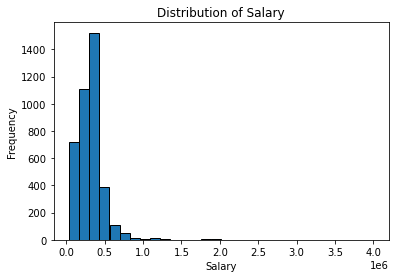

In [22]:
data['Salary'].plot(kind='hist', bins=30, edgecolor='black')
plt.title('Distribution of Salary')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.show()

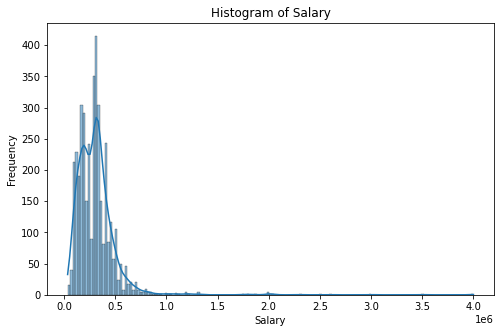

In [23]:
# Histogram
plt.figure(figsize=(8, 5))
sns.histplot(data['Salary'], kde=True)
plt.title('Histogram of Salary')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.show()


#From the above plot as we can see that it's having a long tail at the right side , looks like log normal distribution

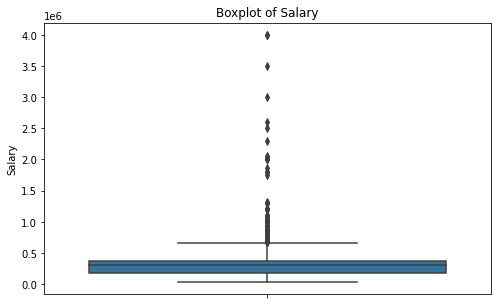

In [24]:
#boxplot
plt.figure(figsize=(8, 5))
sns.boxplot(y=data['Salary'])
plt.title('Boxplot of Salary')
plt.ylabel('Salary')
plt.show()


Salary column has high outliers ,we have to treat them before we do analysis

# 10 percentage

In [25]:
data['10percentage'].min(),data['10percentage'].max()

(43.0, 97.76)

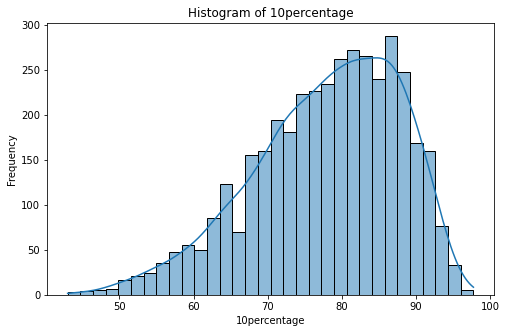

In [26]:
# Histogram
plt.figure(figsize=(8, 5))
sns.histplot(data['10percentage'], kde=True)
plt.title('Histogram of 10percentage')
plt.xlabel('10percentage')
plt.ylabel('Frequency')
plt.show()


From the above plot as we can see that it's having a thick tail towards the left side looks like a negatively skewed distribution

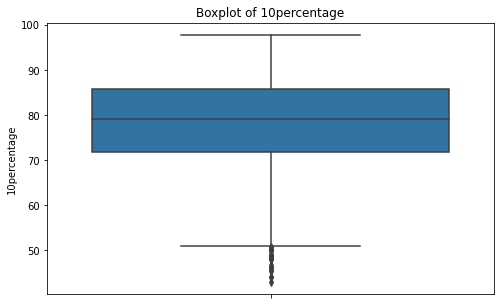

In [27]:
#boxplot
plt.figure(figsize=(8, 5))
sns.boxplot(y=data['10percentage'])
plt.title('Boxplot of 10percentage')
plt.ylabel('10percentage')
plt.show()


# 12 percentage

In [28]:
data['12percentage'].min(),data['12percentage'].max()

(40.0, 98.7)

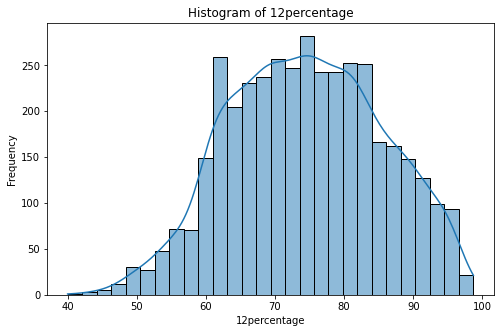

In [29]:
# Histogram
plt.figure(figsize=(8, 5))
sns.histplot(data['12percentage'], kde=True)
plt.title('Histogram of 12percentage')
plt.xlabel('12percentage')
plt.ylabel('Frequency')
plt.show()


Lowest percentage in 12th is 40.0 and Highest percentage in 12th is98.7

From the above plot as we can see that it's having a tail towards left side looks like a negatively skewed distribution

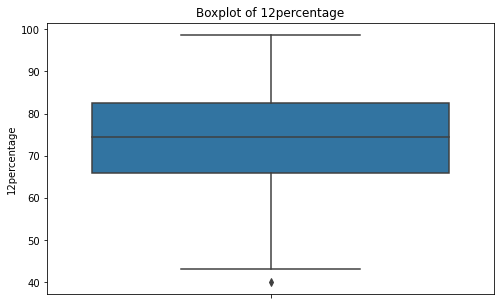

In [30]:
#boxplot
plt.figure(figsize=(8, 5))
sns.boxplot(y=data['12percentage'])
plt.title('Boxplot of 12percentage')
plt.ylabel('12percentage')
plt.show()

# collegeGPA

In [31]:
data['collegeGPA'].min(),data['collegeGPA'].max()

(6.45, 99.93)

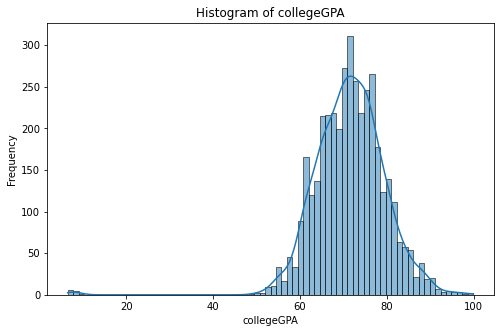

In [32]:
# Histogram
plt.figure(figsize=(8, 5))
sns.histplot(data['collegeGPA'], kde=True)
plt.title('Histogram of collegeGPA')
plt.xlabel('collegeGPA')
plt.ylabel('Frequency')
plt.show()

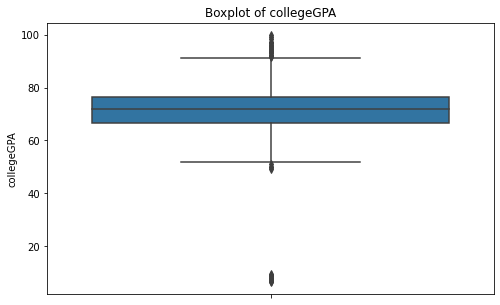

In [33]:
#boxplot
plt.figure(figsize=(8, 5))
sns.boxplot(y=data['collegeGPA'])
plt.title('Boxplot of collegeGPA')
plt.ylabel('collegeGPA')
plt.show()

Lowest CollegeGPA is 6.45 and Highest CollegeGPA is99.93

# Univariate Analysis on Categorical colums

In [34]:
categorical_columns = data.select_dtypes(include=['object']).columns

In [35]:
print(categorical_columns)

Index(['Designation', 'JobCity', 'Gender', '10board', '12board', 'Degree',
       'Specialization', 'CollegeState'],
      dtype='object')


# Gender wise distribution

In [36]:
data['Gender'].value_counts()

m    2998
f     945
Name: Gender, dtype: int64

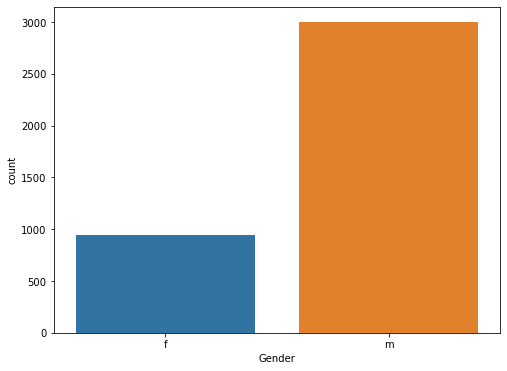

In [37]:
data['Gender'] = data['Gender'].astype('category')

plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='Gender')
plt.show()

From the above plot we can say that there are more male candidates than female

# Designation

In [38]:
data['Designation'].value_counts()

software engineer                    535
software developer                   262
system engineer                      202
programmer analyst                   139
systems engineer                     117
                                    ... 
human resources intern                 1
senior quality assurance engineer      1
clerical assistant                     1
delivery software engineer             1
jr. software developer                 1
Name: Designation, Length: 416, dtype: int64

In [39]:
data['Designation'].nunique()

416

In [40]:
designation_count = data['Designation'].value_counts()
designation_count

software engineer                    535
software developer                   262
system engineer                      202
programmer analyst                   139
systems engineer                     117
                                    ... 
human resources intern                 1
senior quality assurance engineer      1
clerical assistant                     1
delivery software engineer             1
jr. software developer                 1
Name: Designation, Length: 416, dtype: int64

There are 419 unique values

In [41]:
# Taking the most frequent designation
designation_count[:15]

software engineer             535
software developer            262
system engineer               202
programmer analyst            139
systems engineer              117
java software engineer        109
software test engineer        100
project engineer               76
technical support engineer     73
senior software engineer       71
java developer                 67
test engineer                  54
web developer                  52
assistant manager              52
network engineer               50
Name: Designation, dtype: int64

Text(0.5, 1.0, 'Job Designation of a CSE Fresher')

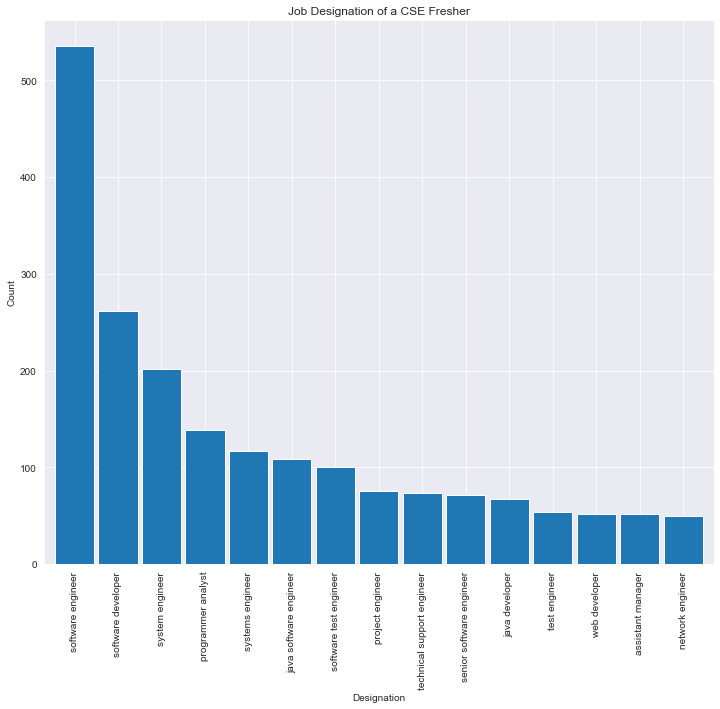

In [42]:
#Plotting the most frequent designation
sns.set_style("darkgrid")
plt.figure(figsize=(12,10))
designation_count[:15].plot(kind='bar' , width=0.9)
plt.xlabel('Designation')
plt.ylabel('Count')
plt.title('Job Designation of a CSE Fresher')

From the above plot we can say that most of the candidate choose software engineering

# JobCity

In [43]:
data['JobCity'].value_counts()

Bangalore           623
-1                  448
Noida               361
Hyderabad           329
Pune                285
                   ... 
Asansol               1
Tirunelvelli          1
Ernakulam             1
Nanded                1
Asifabadbanglore      1
Name: JobCity, Length: 338, dtype: int64

In [44]:
data['JobCity'].nunique()

338

In [45]:
jobcities_count = data['JobCity'].value_counts()
jobcities_count

Bangalore           623
-1                  448
Noida               361
Hyderabad           329
Pune                285
                   ... 
Asansol               1
Tirunelvelli          1
Ernakulam             1
Nanded                1
Asifabadbanglore      1
Name: JobCity, Length: 338, dtype: int64

In [46]:
data['JobCity'].replace(-1,np.nan,inplace=True)
data['JobCity'].dropna(inplace=True)

In [47]:
jobcities_count = data['JobCity'].value_counts()
# Taking the most frequent cities that a candidate choose to work
jobcities_count[:10]
jobcities_count

Bangalore           623
-1                  448
Noida               361
Hyderabad           329
Pune                285
                   ... 
Asansol               1
Tirunelvelli          1
Ernakulam             1
Nanded                1
Asifabadbanglore      1
Name: JobCity, Length: 338, dtype: int64

Text(0.5, 1.0, 'Preferred Cities')

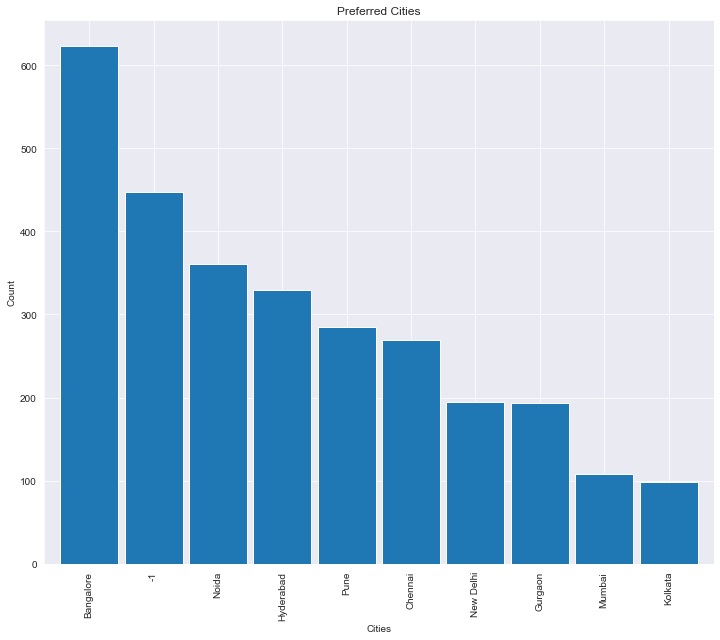

In [48]:
sns.set_style("darkgrid")
plt.figure(figsize=(12,10))
jobcities_count[:10].plot(kind='bar' , width=0.9)
plt.xlabel('Cities')
plt.ylabel('Count')
plt.title('Preferred Cities')

most of the people are working in bangalore

# Degree obtained/pursued by the candidate

In [49]:
data['Degree'].value_counts()

B.Tech/B.E.      3648
MCA               240
M.Tech./M.E.       53
M.Sc. (Tech.)       2
Name: Degree, dtype: int64

In [50]:
data['Degree'].nunique()

4

In [51]:
degree_count = data['Degree'].value_counts()
degree_count

B.Tech/B.E.      3648
MCA               240
M.Tech./M.E.       53
M.Sc. (Tech.)       2
Name: Degree, dtype: int64

Text(0.5, 1.0, 'Degree obtained/pursued by the candidate')

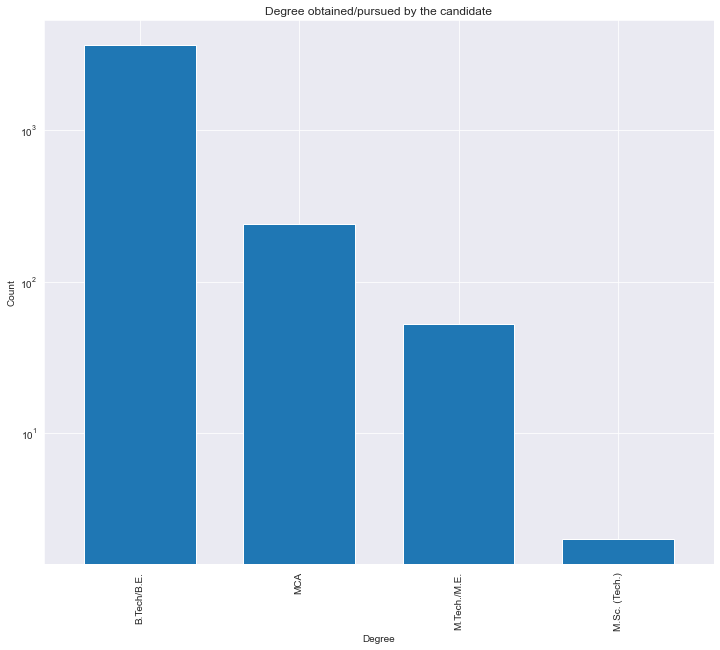

In [52]:
sns.set_style("darkgrid")
plt.figure(figsize=(12,10))
degree_count.plot(kind='bar' , width=0.7 , logy=True)
plt.xlabel('Degree')
plt.ylabel('Count')
plt.title('Degree obtained/pursued by the candidate')

most of the candidates are from b.tech

# Specialization

In [53]:
data['Specialization'].value_counts()

electronics and communication engineering      865
computer science & engineering                 731
information technology                         654
computer engineering                           593
computer application                           241
mechanical engineering                         201
electronics and electrical engineering         191
electronics & telecommunications               120
electrical engineering                          79
electronics & instrumentation eng               32
civil engineering                               29
electronics and instrumentation engineering     27
information science engineering                 27
instrumentation and control engineering         20
electronics engineering                         19
biotechnology                                   15
other                                           13
industrial & production engineering             10
applied electronics and instrumentation          9
chemical engineering           

In [54]:
data['Specialization'].nunique()

46

Text(0.5, 1.0, 'Specialization pursued by the candidate')

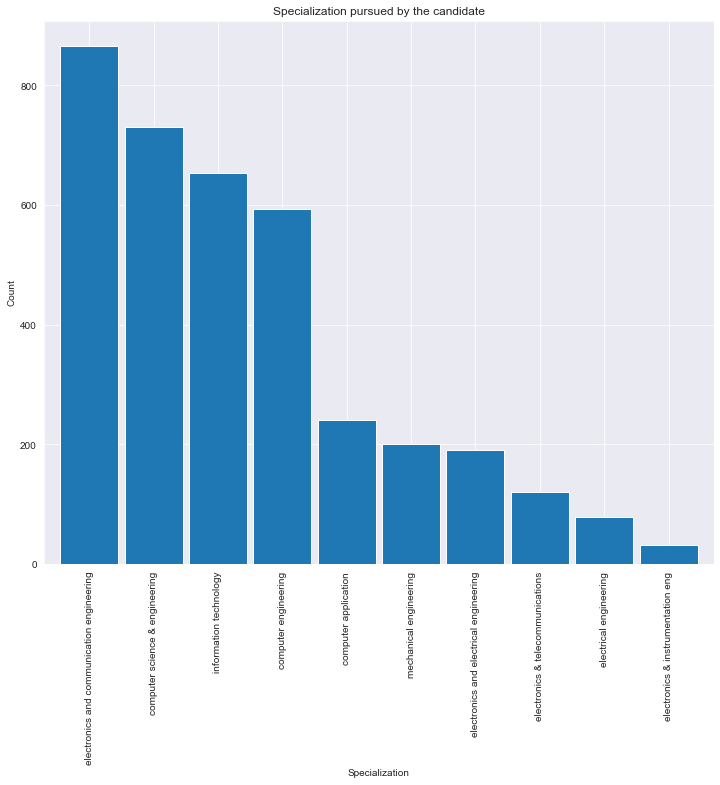

In [55]:
specialization_count = data['Specialization'].value_counts()
#Plotting the most frequent specialization
sns.set_style("darkgrid")
plt.figure(figsize=(12,10))
specialization_count[:10].plot(kind='bar' , width=0.9)
plt.xlabel('Specialization')
plt.ylabel('Count')
plt.title('Specialization pursued by the candidate')

most of the students from electronics and communication engineering

# Bivariate Analysis on Numerical and Numerical columns

In [56]:
from ipywidgets import interact_manual


In [57]:
@interact_manual
def groupby(col1=data.select_dtypes('number').columns,
            col2=data.select_dtypes('number').columns):
    sns.scatterplot(data=df, x=col1, y=col2, hue='Gender')
    plt.show()

interactive(children=(Dropdown(description='col1', options=('Salary', '10percentage', '12graduation', '12perce…

# Bivariate Analysis on Categorical and Categorical columns

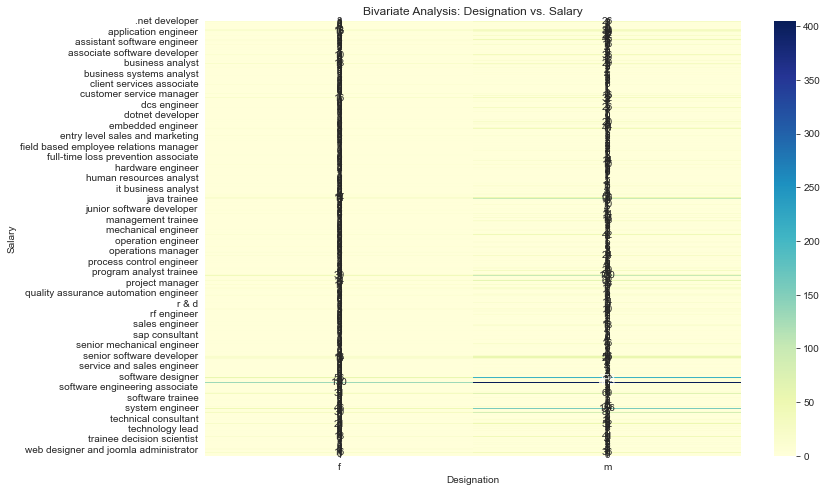

In [58]:
cross_tab = pd.crosstab(data['Designation'], data['Gender'])
plt.figure(figsize=(12, 8))
sns.heatmap(cross_tab, cmap="YlGnBu", annot=True, fmt='d', cbar=True)
plt.title('Bivariate Analysis: Designation vs. Salary')
plt.xlabel('Designation')
plt.ylabel('Salary')
plt.show()

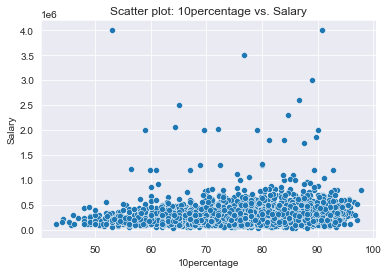

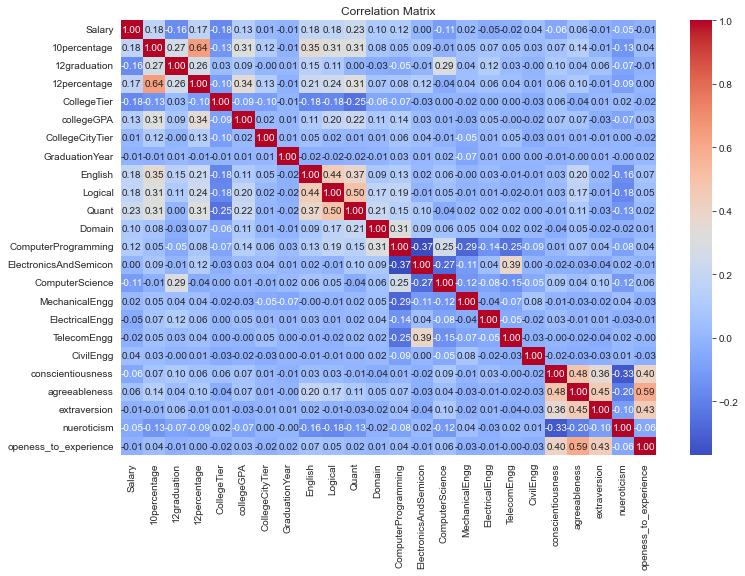

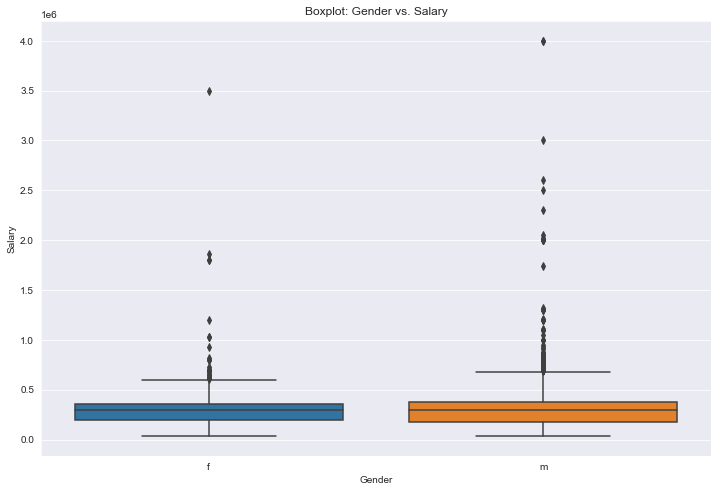

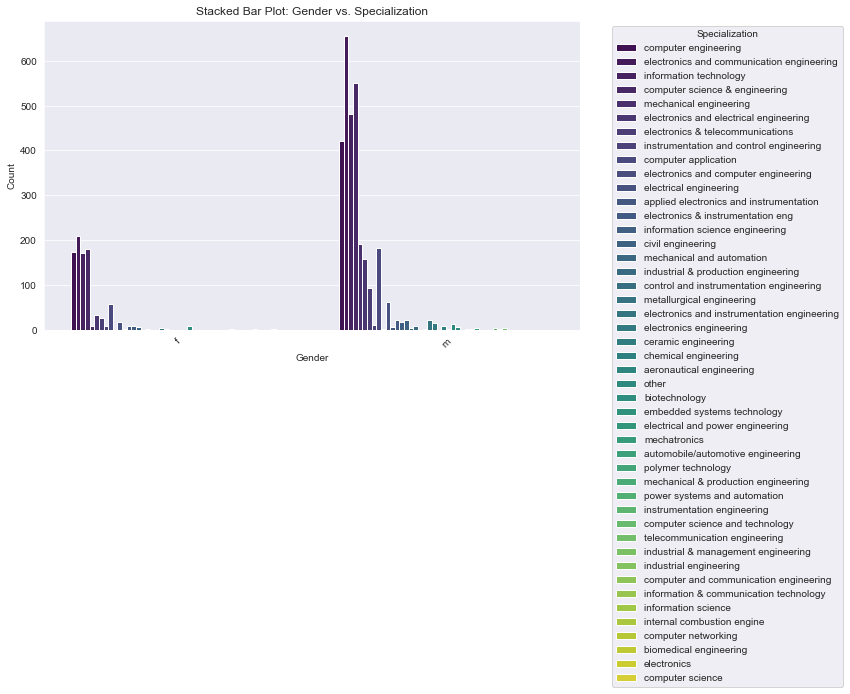

In [59]:
# Scatter plot: Numerical vs. Numerical Variables
sns.scatterplot(data=data, x='10percentage', y='Salary')
plt.title('Scatter plot: 10percentage vs. Salary')
plt.xlabel('10percentage')
plt.ylabel('Salary')
plt.show()

# Correlation matrix
correlation_matrix = data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

# Boxplot: Categorical vs. Numerical Variables
plt.figure(figsize=(12, 8))
sns.boxplot(data=data, x='Gender', y='Salary')
plt.title('Boxplot: Gender vs. Salary')
plt.xlabel('Gender')
plt.ylabel('Salary')
plt.show()

# Stacked bar plot: Categorical vs. Categorical Variables
plt.figure(figsize=(12, 8))
sns.countplot(data=data, x='Gender', hue='Specialization', palette='viridis')
plt.title('Stacked Bar Plot: Gender vs. Specialization')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(title='Specialization', bbox_to_anchor=(1.05, 1), loc='upper left')  # Adjust legend position
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()


- There is a positive relationship between 10percentage and salary
- There is a strong positive correlation between 10th percentage and 12 th percentage
- There are more outliers in male salary
- The average salary of male and female are almost same